In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('news_classification.csv')
df


,Unnamed: 0,category,filename,title,content
0,0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...,...
2220,2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [3]:
new = df.drop(columns=['Unnamed: 0'])
new

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [4]:
# df.to_csv("news_classification.csv")
new["category"].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [5]:
# sharing our data into x and y variables
data = new[["title", "category"]]

x = np.array(data["title"])
y = np.array(data["category"])

In [6]:
cv = CountVectorizer()
X = cv.fit_transform(x)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [8]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [19]:
user = input("Enter news headline: ").lower()
data = cv.transform([user]).toarray()
y_pred = model.predict(data)
print(y_pred)

Enter news headline: food
['sport']


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1490, 1]

In [12]:
from sklearn import svm
model = svm.SVC(kernel="linear")
model.fit(x_train,y_train)

SVC(kernel='linear')

In [13]:
user = input("Enter news headline: ").lower()
data = cv.transform([user]).toarray()
y_pred = model.predict(data)
print(y_pred)

Enter news headline: dollars
['sport']


NotImplementedError: adding a nonzero scalar to a sparse matrix is not supported

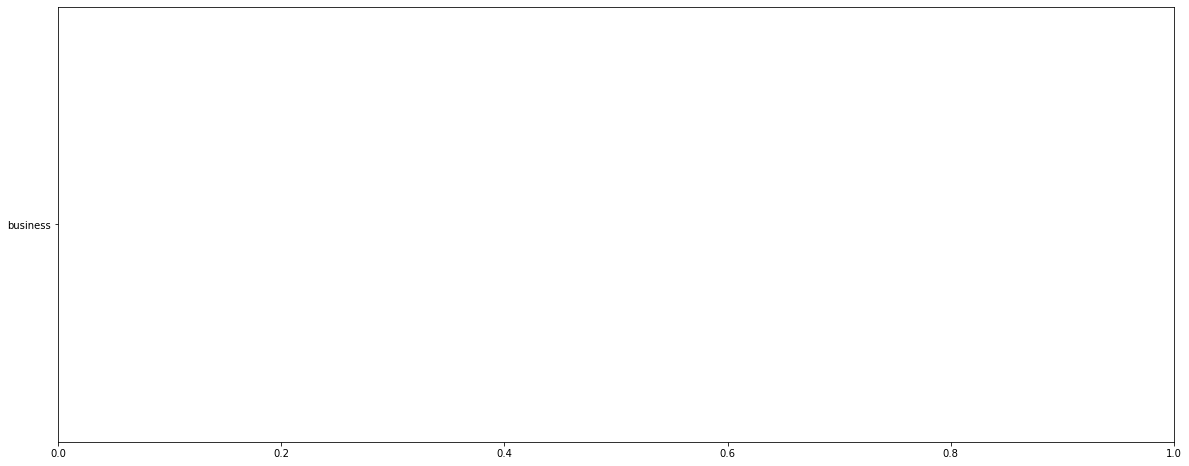

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(X, y_pred)
plt.title("News Plot")
plt.legend()
plt.show()


In [15]:
import pickle as pk

In [16]:
# how to save a model
with open('news_model.txt', 'wb') as sr:
    pk.dump(model, sr)

In [21]:
# how to load and use your model
may = open('news_model.txt', 'rb')
nat = pk.load(may)

In [22]:
nat.predict(data)

array(['sport'], dtype=object)